## Time Series Data Analysis and Plotting

Time series analysis - investigating climate data using Python and Pandas. Time series data are repeated measurements of the same phenomenon, taken sequentially over time.

`import pandas as pd`

`from matplotlib import pyplot as plt`

`%matplotlib inline`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Create DataFrames

GISTEMP.csv - These data represent temperature anomalies (differences from the mean/expected value) per month and per season (DJF=Dec-Feb, MAM=Mar-May, etc).

CO2.csv - These data give us the average CO₂ emission (in metric tons) per person. The dataset is divided up by countries and other categories such as ‘World’ or ‘Upper middle income.’

Create a dataFrame from the raw temperature anomalies dataset. Use `skiprows=1`.

`raw_t = pd.read_csv("./data/GISTEMP.csv", skiprows=1)`

`raw_t.head()`

In [2]:
raw_t = pd.read_csv("./data/GISTEMP.csv", skiprows=1)
raw_t.head()

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.29 -0.18 -0.11 -0.20 -0.12 -0.23 -0.21  -.09  -.16  -.23  -.20   
1  1881 -0.16 -0.17  0.04  0.04  0.02 -0.20 -0.07  -.03  -.14  -.21  -.22   
2  1882  0.14  0.15  0.03 -0.19 -0.16 -0.26 -0.21  -.06  -.10  -.25  -.16   
3  1883 -0.32 -0.39 -0.13 -0.17 -0.20 -0.13 -0.08  -.15  -.21  -.14  -.22   
4  1884 -0.16 -0.08 -0.37 -0.43 -0.37 -0.41 -0.35  -.26  -.27  -.24  -.30   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.23  -.19   ***   *** -0.14  -.18  -.20  
1  -.11  -.10  -.11  -.18  0.03  -.10  -.19  
2  -.25  -.11  -.10   .06 -0.10  -.17  -.17  
3  -.16  -.19  -.20  -.32 -0.17  -.12  -.19  
4  -.29  -.29  -.28  -.13 -0.39  -.34  -.27

Create a dataFrame from the CO₂ emissions dataset. Use `skiprows=3.`

`raw_e = pd.read_csv("./data/CO2.csv", skiprows=3)`

`raw_e.head()`

In [3]:
raw_e = pd.read_csv("./data/CO2.csv", skiprows=3)
raw_e.head()

Country Name Country Code                          Indicator Name  \
0        Aruba          ABW  CO2 emissions (metric tons per capita)   
1  Afghanistan          AFG  CO2 emissions (metric tons per capita)   
2       Angola          AGO  CO2 emissions (metric tons per capita)   
3      Albania          ALB  CO2 emissions (metric tons per capita)   
4      Andorra          AND  CO2 emissions (metric tons per capita)   

   Indicator Code        1960        1961        1962        1963        1964  \
0  EN.ATM.CO2E.PC  204.620372  208.822811  226.118079  214.800370  207.615777   
1  EN.ATM.CO2E.PC    0.046057    0.053589    0.073721    0.074161    0.086174   
2  EN.ATM.CO2E.PC    0.100835    0.082204    0.210531    0.202737    0.213560   
3  EN.ATM.CO2E.PC    1.258195    1.374186    1.439956    1.181681    1.111742   
4  EN.ATM.CO2E.PC         NaN         NaN         NaN         NaN         NaN   

         1965  ...       2012      2013      2014      2015      2016  2017  \
0  185.203957  ...  13.157722  8.353561  8.410064  8.610374  8.426911   NaN   
1    0.101285  ...   0.345149  0.280455  0.253728  0.262556  0.245101   NaN   
2    0.205891  ...   1.361181  1.295075  1.664741  1.240245  1.202861   NaN   
3    1.166099  ...   1.697966  1.697279  1.900070  1.602648  1.577163   NaN   
4         NaN  ...   5.916884  5.901775  5.832906  5.969786  6.072370   NaN   

   2018  2019  2020  Unnamed: 65  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN          NaN  

[5 rows x 66 columns]

## Data Wrangling

Transforming data from one format to another to make them usable

### Wrangling Temperature Data

* Create a DateTime index

* Handling missing values

* Resampling to a different frequency


### Creating a DateTime index

For the temperature data, create an empty dataframe with a DateTime index of monthly frequency. Use the raw data to populate the new dataframe.

Use the [date_range()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) function to create a date range index. The index will range from January 1880 to June 2019.

`date_rng = pd.date_range(start="1/1/1880", end="6/1/2019", freq="M")`

Create an empty dataframe with one column named `date` containing the values from the date index

`t = pd.DataFrame(date_rng, columns=["date"])`

Create a column for the anomoly values

`t["Avg_Anomaly_deg_C"] = None`

Set the index to the date column (DateTime index)

`t.set_index("date", inplace=True)`

In [4]:
date_rng = pd.date_range(start="1/1/1880", end="6/1/2019", freq="M")
t = pd.DataFrame(date_rng, columns=["date"])
t["Avg_Anomaly_deg_C"] = None
t.set_index("date", inplace=True)
t

Avg_Anomaly_deg_C
date                        
1880-01-31              None
1880-02-29              None
1880-03-31              None
1880-04-30              None
1880-05-31              None
...                      ...
2019-01-31              None
2019-02-28              None
2019-03-31              None
2019-04-30              None
2019-05-31              None

[1673 rows x 1 columns]

Extract all rows of temperature data from the year and month columns (0 through 12).

`raw_t = raw_t.iloc[:,:13]`

In [6]:
raw_t = raw_t.iloc[:,:13]
raw_t

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    1880 -0.29 -0.18 -0.11 -0.20 -0.12 -0.23 -0.21  -.09  -.16  -.23  -.20   
1    1881 -0.16 -0.17  0.04  0.04  0.02 -0.20 -0.07  -.03  -.14  -.21  -.22   
2    1882  0.14  0.15  0.03 -0.19 -0.16 -0.26 -0.21  -.06  -.10  -.25  -.16   
3    1883 -0.32 -0.39 -0.13 -0.17 -0.20 -0.13 -0.08  -.15  -.21  -.14  -.22   
4    1884 -0.16 -0.08 -0.37 -0.43 -0.37 -0.41 -0.35  -.26  -.27  -.24  -.30   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
135  2015  0.81  0.87  0.90  0.75  0.75  0.79  0.71   .79   .82  1.07  1.03   
136  2016  1.15  1.35  1.31  1.07  0.91  0.77  0.82  1.00   .88   .90   .91   
137  2017  0.98  1.13  1.13  0.92  0.89  0.70  0.82   .87   .76   .88   .86   
138  2018  0.77  0.85  0.91  0.87  0.81  0.74  0.78   .73   .76   .99   .78   
139  2019  0.87  0.92  1.11  0.97  0.85  0.86  0.90   ***   ***   ***   ***   

      Dec  
0    -.23  
1    -.11  
2    -.25  
3    -.16  
4    -.29  
..    ...  
135  1.10  
136   .83  
137   .89  
138   .89  
139   ***  

[140 rows x 13 columns]

### Using the Apply Function

Import the following libraries

`from datetime import datetime` *useful for parsing dates and times*

`import calendar` *used to get the last day of each month*

In [7]:
from datetime import datetime
import calendar

Use the [apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) function to step through the rows of the raw data and apply them to the new dataframe.

Define a function to populate the dataframe with row values from the raw temperature data:

`def populate_anom():`

&nbsp;&nbsp;&nbsp;&nbsp;`year = row["Year"]`

&nbsp;&nbsp;&nbsp;&nbsp;`monthly_anomolies = row.iloc[1:]`

&nbsp;&nbsp;&nbsp;&nbsp;`months = monthly_anomolies.index`

&nbsp;&nbsp;&nbsp;&nbsp;`for month in monthly_anomolies.index:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`t.loc[date_index] = monthly_anomolies[month]`

`strptime` creates a  date time object from a string

`strftime` creates a string from a date time object

For more on strptime and strftime see https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

In [7]:
def populate_anom(row):
    year = row["Year"]
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, "%b").month)[1]
        date_index = datetime.strptime(f"{year} {month} {last_day}", "%Y %b %d")
        t.loc[date_index] = monthly_anomolies[month]


        
### Lambda
 
 A lambda function is a one-line function, sometimes called an 'anonymous function.' These functions can take any number of arguments, but can only have one expression.
 
Example:
 
`x = lambda a : a + 10`

`(x(5))`

In [36]:
x = lambda a : a + 10
(x(5))

15

Using lambda, apply the `populate_anom()` function to each row of raw data (axis=1)

`_ = raw_t.apply(lambda row: populate_anom(row), axis=1)`

In [8]:
def populate_anom(row):
    year = row["Year"]
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, "%b").month)[1]
        date_index = datetime.strptime(f"{year} {month} {last_day}", "%Y %b %d")
        t.loc[date_index] = monthly_anomolies[month]
        
_ = raw_t.apply(lambda row: populate_anom(row), axis=1)

## Formatting Values

Handling missing values and converting data types

Using the [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to populate `NaN` values

Define a function to convert values to floats, and return a 'NaN = Not a Number' if not possible

`import numpy as np`

`def clean_anomaly_value(raw_value):`

&nbsp;&nbsp;&nbsp;&nbsp;`try:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return float(raw_value)`

&nbsp;&nbsp;&nbsp;&nbsp;`except:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return np.NaN`

`apply` the function to each raw_value in the `"Avg_Anomaly_deg_C"` column

Fill NaN values using `method="ffill"`

`t.fillna(method="ffill", inplace=True)`

In [9]:
import numpy as np

def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN

#Apply above function to all anomaly values in DataFrame
t["Avg_Anomaly_deg_C"] = t["Avg_Anomaly_deg_C"].apply(lambda raw_value: clean_anomaly_value(raw_value))
t.fillna(method="ffill", inplace=True)
t

Avg_Anomaly_deg_C
date                         
1880-01-31              -0.29
1880-02-29              -0.18
1880-03-31              -0.11
1880-04-30              -0.20
1880-05-31              -0.12
...                       ...
2019-08-31               0.90
2019-09-30               0.90
2019-10-31               0.90
2019-11-30               0.90
2019-12-31               0.90

[1680 rows x 1 columns]

### Create a Simple Plot

`plt.figure(figsize=(10,8))`

`plt.xlabel('Time')`

`plt.ylabel('Temperature Anomaly (°Celsius)')`

`plt.plot(t, color='#1C7C54', linewidth=1.0)`

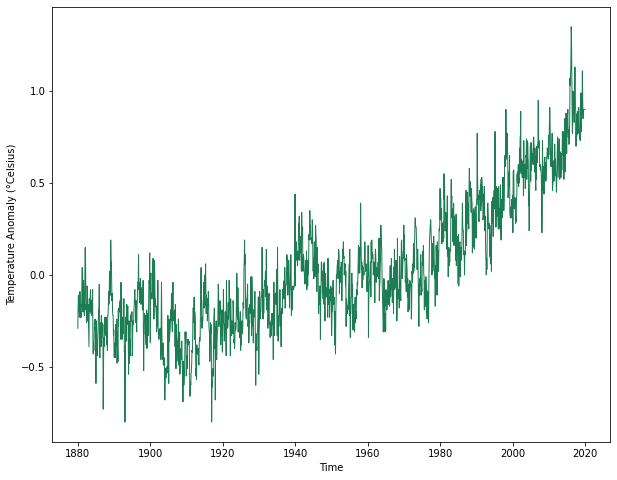

In [10]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

### Resampling Data

Sometimes data are too granular to visualize nicely. The [resample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function can change the frequency from months to years.

Downsample the temperature data into years, the string ‘A’ represents ‘calendar year-end’. 

`t.resample('A').mean().head()`

In [11]:
t.resample('A').mean().head()

Avg_Anomaly_deg_C
date                         
1880-12-31          -0.187500
1881-12-31          -0.100833
1882-12-31          -0.110000
1883-12-31          -0.191667
1884-12-31          -0.294167

#### Plot the Resampled Data

`plt.figure(figsize=(10,8))`

`plt.xlabel("Time")`

`plt.ylabel("Temperature Anomaly (°Celsius)")`

`plt.plot(t.resample("A").mean(), color="#1C7C54", linewidth=1.0)`


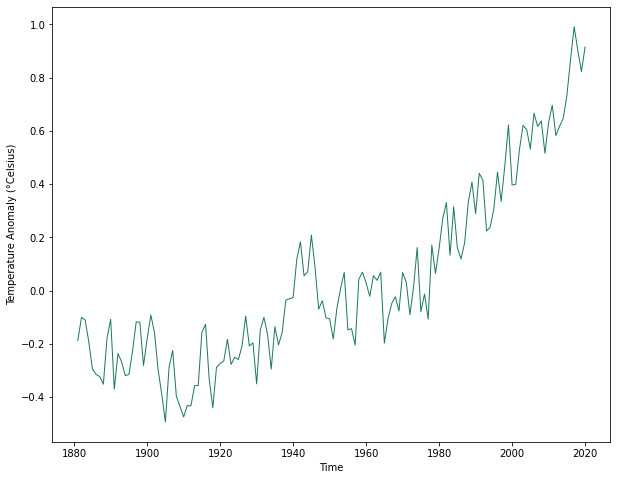

In [12]:
plt.figure(figsize=(10, 8))
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°Celsius)")
plt.plot(t.resample("A").mean(), color="#1C7C54", linewidth=1.0)

### Wrangling CO2 Data

* Slicing and Searching

* Useful functions

Select only the row representing the years containing CO₂ emissions for the entire world. 

Create a new dataframe that uses a DateTime index — and then use the raw data to populate it.

In [13]:
raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']

1960      1961      1962      1963      1964      1965      1966  \
257  0.003108  0.003079  0.003151  0.003256  0.003373  0.003454  0.003553   

         1967      1968      1969  ...      2009      2010      2011  \
257  0.003593  0.003701  0.003842  ...  0.004572  0.004832  0.004932   

         2012      2013      2014      2015      2016  2017  2018  
257  0.004983  0.004986  0.004941  0.004902  0.004849   NaN   NaN  

[1 rows x 59 columns]

In [14]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
#Select just the row with co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']
#print (raw_e_world)

# Transpose the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
#print (raw_e_world)
raw_e_world.columns = ['value']

# Create a new dataFrame with a date range 1960-2018.
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

#Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e


Global CO2 Emissions per Capita
date                                       
1960-12-31                         0.003108
1961-12-31                         0.003079
1962-12-31                         0.003151
1963-12-31                         0.003256
1964-12-31                         0.003373
1965-12-31                         0.003454
1966-12-31                         0.003553
1967-12-31                         0.003593
1968-12-31                         0.003701
1969-12-31                         0.003842
1970-12-31                         0.004035
1971-12-31                         0.004103
1972-12-31                         0.004182
1973-12-31                         0.004325
1974-12-31                         0.004250
1975-12-31                         0.004148
1976-12-31                         0.004313
1977-12-31                         0.004371
1978-12-31                         0.004346
1979-12-31                         0.004509
1980-12-31                         0.004385
1981-12-31                         0.004177
1982-12-31                         0.004068
1983-12-31                         0.003981
1984-12-31                         0.004054
1985-12-31                         0.004105
1986-12-31                         0.004157
1987-12-31                         0.004188
1988-12-31                         0.004267
1989-12-31                         0.004286
1990-12-31                         0.004218
1991-12-31                         0.004196
1992-12-31                         0.004077
1993-12-31                         0.004051
1994-12-31                         0.004021
1995-12-31                         0.004050
1996-12-31                         0.004092
1997-12-31                         0.004079
1998-12-31                         0.004021
1999-12-31                         0.004024
2000-12-31                         0.004078
2001-12-31                         0.004050
2002-12-31                         0.004096
2003-12-31                         0.004269
2004-12-31                         0.004409
2005-12-31                         0.004532
2006-12-31                         0.004628
2007-12-31                         0.004650
2008-12-31                         0.004754
2009-12-31                         0.004572
2010-12-31                         0.004832
2011-12-31                         0.004932
2012-12-31                         0.004983
2013-12-31                         0.004986
2014-12-31                         0.004941
2015-12-31                         0.004902
2016-12-31                         0.004849
2017-12-31                              NaN
2018-12-31                              NaN

Select all data after the year 2011:

`e[e.index.year>2011]`

In [15]:
e[e.index.year>2011]

Global CO2 Emissions per Capita
date                                       
2012-12-31                         0.004983
2013-12-31                         0.004986
2014-12-31                         0.004941
2015-12-31                         0.004902
2016-12-31                         0.004849
2017-12-31                              NaN
2018-12-31                              NaN

Fill NaN vales using forward fill

`e.fillna(method='ffill', inplace=True)`

`e[e.index.year>2011]`

In [16]:
e.fillna(method='ffill', inplace=True)
e[e.index.year>2011]

Global CO2 Emissions per Capita
date                                       
2012-12-31                         0.004983
2013-12-31                         0.004986
2014-12-31                         0.004941
2015-12-31                         0.004902
2016-12-31                         0.004849
2017-12-31                         0.004849
2018-12-31                         0.004849

Use the DateTime index to search on a range

`e['1984-01-04':'1990-01-06']`

In [17]:
e['1984-01-04':'1990-01-06']

Global CO2 Emissions per Capita
date                                       
1984-12-31                         0.004054
1985-12-31                         0.004105
1986-12-31                         0.004157
1987-12-31                         0.004188
1988-12-31                         0.004267
1989-12-31                         0.004286

#### Plotting the Temperature Data

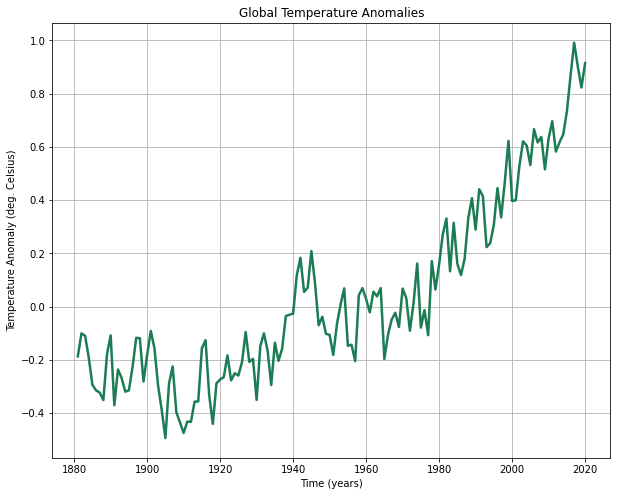

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

t_resampled = t.resample('A').mean()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)
ax.set(xlabel="Time (years)", ylabel="Temperature Anomaly (deg. Celsius)", title="Global Temperature Anomalies")
ax.grid()

#### Plot the CO2 Data

Create figures and axes

`fig, ax = plt.subplots(figsize=(10,8))`

Plot co2 emissions data with specific colour and line thickness

`ax.plot(e, color='#3393FF', linewidth=2.5)`

Set axis labels and graph title

`ax.set(xlabel="Time (years)", ylabel="Emissions (Metric Tons per Capita)", title="Global CO2 Emission over Time")`

Enable grid

`ax.grid()`

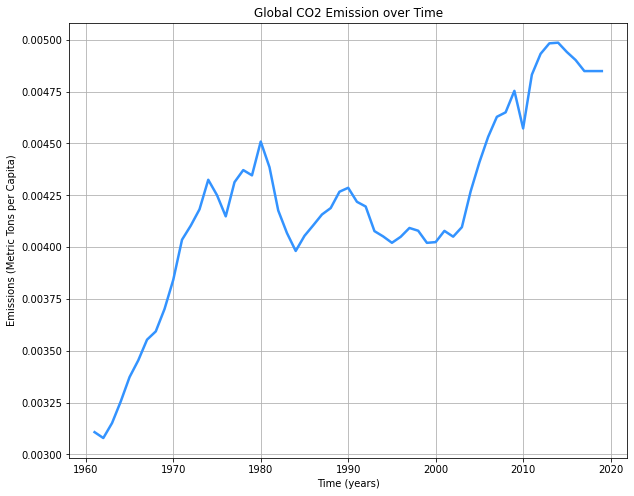

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(e, color="#3393FF", linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel="Emissions (Metric Tons per Capita)",title="Global CO2 Emission over Time")
ax.grid()

In [21]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [22]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly (deg. Celsius)', title='Global Temperature Anomalies')